#**Date Describtion**

* Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels! 

* Data Link https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews

##**Imports**

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

##**Loading Data**

In [2]:
Data_path = '/content/drive/MyDrive/Colab Notebooks/sikitlearn/Trip Advisor Reviews -NLP/tripadvisor_hotel_reviews.csv'

In [4]:
df = pd.read_csv(Data_path)

df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


##**EDA & Sentiment Analylsis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [11]:
#Sentiment Analylsis of each Review
sent = []

for rv in df['Review']:
  if TextBlob(rv).sentiment.polarity < 0:
    sent.append('Negative')
  elif TextBlob(rv).sentiment.polarity > 0:
    sent.append('Positive') 
  else:
   sent.append('Neutral') 

df['Sentiment'] = np.array(sent)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

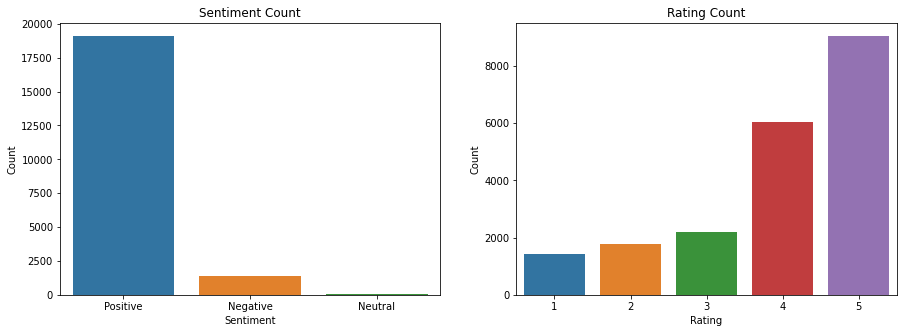

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['Sentiment'])
plt.title('Sentiment Count')
plt.xlabel("Sentiment")
plt.ylabel("Count")


plt.subplot(1,2,2)
sns.countplot(df['Rating'])
plt.title('Rating Count')
plt.xlabel("Rating")
plt.ylabel("Count")


##**Natural Language Processing & prepare the data**

In [32]:
#initt the TFidf vectorizer

vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)

x = vectorizer.fit_transform(df['Review'])

y = df['Rating']

# split data int train & test 

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state = 42)

In [33]:
x_train.shape , x_test.shape

((15368, 52650), (5123, 52650))

#**Create & fit the models**

In [34]:
Rf_clf = RandomForestClassifier()
Rf_clf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
print("Train Accuracy : {:.2f} %".format(accuracy_score(Rf_clf.predict(x_train),y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(Rf_clf.predict(x_test),y_test)*100))

Train Accuracy : 100.00 %
Test Accuracy  : 51.24 %


In [49]:
#the logistic regression model 

Log_clf = LogisticRegression()

Log_clf.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
print("Train Accuracy : {:.2f} %".format(accuracy_score(Log_clf.predict(x_train),y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(Log_clf.predict(x_test),y_test)*100))

Train Accuracy : 81.21 %
Test Accuracy  : 61.88 %


##**Feature Engeniring**
**the accuracy is quite poor. Possible justificaion might be the inconsistency in the review and ratings , maybe grouping the reviews into two categories depending on their count - 1,2,3 for class 0 and 4,5 for class 1. This way, the reviews in each group will be more consistent with the ratings**

In [52]:
groups = []

for rates in df['Rating']:
  if rates in [1,2,3]:
    groups.append(0)
  else:
    groups.append(1)
df['Group'] = groups

In [53]:
df.head()

,Review,Rating,Sentiment,Group
0,nice hotel expensive parking got good deal sta...,4,Positive,1
1,ok nothing special charge diamond member hilto...,2,Positive,0
2,nice rooms not 4* experience hotel monaco seat...,3,Positive,0
3,"unique, great stay, wonderful time hotel monac...",5,Positive,1
4,"great stay great stay, went seahawk game aweso...",5,Positive,1


#**fit & compare models after adding new feature**

In [54]:
#perform the train test split again, but this time with Group as the target.

x = vectorizer.fit_transform(df['Review'])

y = df['Group'] 

#split to train and test 

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [58]:
#the randomforest model 

Rf_clf.fit(x_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(Rf_clf.predict(x_train),y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(Rf_clf.predict(x_test),y_test)*100))
print(classification_report(y_test,Rf_clf.predict(x_test)))

Train Accuracy : 100.00 %
Test Accuracy  : 83.48 %
              precision    recall  f1-score   support

           0       0.96      0.38      0.55      1763
           1       0.82      0.99      0.90      5000

    accuracy                           0.83      6763
   macro avg       0.89      0.69      0.72      6763
weighted avg       0.86      0.83      0.81      6763



In [59]:
#the logistic model 
Log_clf.fit(x_train,y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(Log_clf.predict(x_train),y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(Log_clf.predict(x_test),y_test)*100))
print(classification_report(y_test,Log_clf.predict(x_test)))

Train Accuracy : 93.23 %
Test Accuracy  : 89.65 %
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1763
           1       0.90      0.97      0.93      5000

    accuracy                           0.90      6763
   macro avg       0.89      0.83      0.86      6763
weighted avg       0.90      0.90      0.89      6763

